Загрузка данных и знакомство с ними

In [372]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import pickle

In [373]:
df = pd.read_csv('../data/dataset.csv')

In [374]:
df.head(100)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
95,corolla altis,2012,5.85,18.61,72000,Petrol,Dealer,Manual,0
96,innova,2016,20.75,25.39,29000,Diesel,Dealer,Automatic,0
97,corolla altis,2017,17.00,18.64,8700,Petrol,Dealer,Manual,0
98,corolla altis,2013,7.05,18.61,45000,Petrol,Dealer,Manual,0


In [375]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [376]:
df['Year'] = df['Year'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Selling_type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Fuel_Type'].astype('category')

In [377]:
df['Driven_kms'] = df['Driven_kms'].astype('int32')
df['Owner'] = df['Owner'].astype('int16')

In [378]:
df['Selling_Price'] = df['Selling_Price'].astype('float16')
df['Present_Price'] = df['Present_Price'].astype('float16')

In [379]:
df.describe()

,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000
mean,4.660156,7.628906,36947.205980,0.043189
std,5.082031,8.640625,38886.883882,0.247915
min,0.099976,0.320068,500.000000,0.000000
25%,0.899902,1.200195,15000.000000,0.000000
50%,3.599609,6.398438,32000.000000,0.000000
75%,6.000000,9.898438,48767.000000,0.000000
max,35.000000,92.625000,500000.000000,3.000000


In [380]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['Year', 'Fuel_Type', 'Selling_type', 'Transmission']

In [381]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

In [382]:
df = df.drop(columns=['Car_Name']) # уменьшили размер в 4 раза (5.3 kб против 21.3)

In [383]:
df.drop_duplicates(inplace=True)

In [384]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Year           299 non-null    category
 1   Selling_Price  299 non-null    float16 
 2   Present_Price  299 non-null    float16 
 3   Driven_kms     299 non-null    int32   
 4   Fuel_Type      299 non-null    category
 5   Selling_type   299 non-null    category
 6   Transmission   299 non-null    category
 7   Owner          299 non-null    int16   
dtypes: category(4), float16(2), int16(1), int32(1)
memory usage: 7.5 KB


In [385]:
for cat in cat_features:
    print(f'{cat} - numer of unique = {df[cat].nunique()}')

Year - numer of unique = 16
Fuel_Type - numer of unique = 3
Selling_type - numer of unique = 3
Transmission - numer of unique = 3


In [386]:
for col in cat_features:
    print(f'Unique categories in {col}: {df[col].value_counts()}')

Unique categories in Year: Year
2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2003     2
2007     2
2004     1
2018     1
Name: count, dtype: int64
Unique categories in Fuel_Type: Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Unique categories in Selling_type: Selling_type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Unique categories in Transmission: Transmission
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64


Анализ признаков для модели

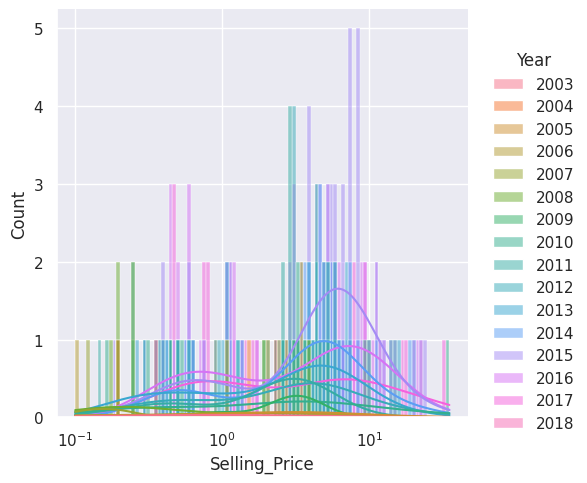

In [387]:
sns.displot(df, x='Selling_Price', bins=100, hue='Year', kde=True, log_scale=True)

<Axes: xlabel='Driven_kms', ylabel='Selling_Price'>

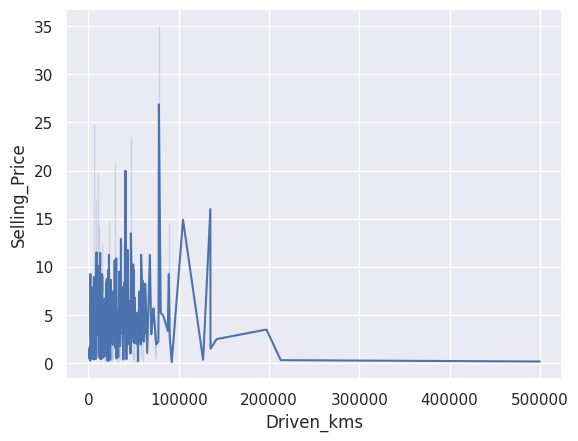

In [388]:
sns.set_theme(style="darkgrid")

sns.lineplot(df, x="Driven_kms", y="Selling_Price"
             )

In [389]:
# Создаем новый признак
df['car_mileage'] = df.apply(lambda x: 'low' if x['Driven_kms'] < 10000 \
                             else 'high' if x['Driven_kms'] > 50000 \
                             else 'mid', axis = 1) 

def getPriceDiff(x, y):
    return x/y

df['price_diff'] = df.apply(lambda x: getPriceDiff(x['Selling_Price'], x['Present_Price']), axis = 1) 
num_features = df.select_dtypes(include=['number']).columns.to_list()
df.describe()


,Selling_Price,Present_Price,Driven_kms,Owner,price_diff
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,4.589844,7.539062,36916.752508,0.043478,0.633561
std,4.984375,8.562500,39015.170352,0.248720,0.202806
min,0.099976,0.320068,500.000000,0.000000,0.105332
25%,0.849854,1.200195,15000.000000,0.000000,0.504931
50%,3.509766,6.101562,32000.000000,0.000000,0.653345
75%,6.000000,9.839844,48883.500000,0.000000,0.790299
max,35.000000,92.625000,500000.000000,3.000000,0.988982


In [390]:
df['car_mileage'].value_counts()

car_mileage
mid     186
high     66
low      47
Name: count, dtype: int64

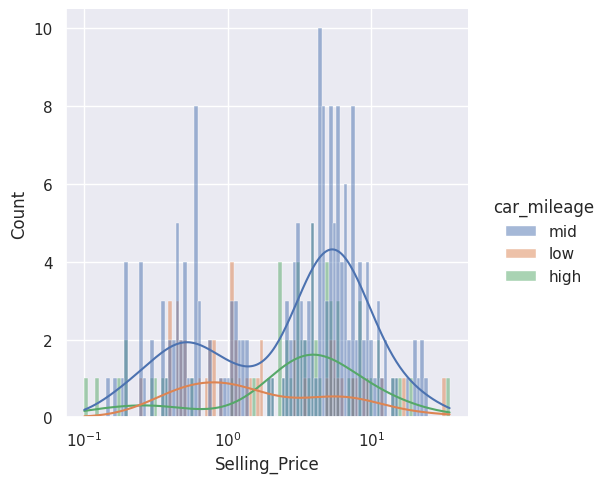

In [391]:
sns.displot(df, x='Selling_Price', bins=100, hue='car_mileage', kde=True, log_scale=True)

<Axes: >

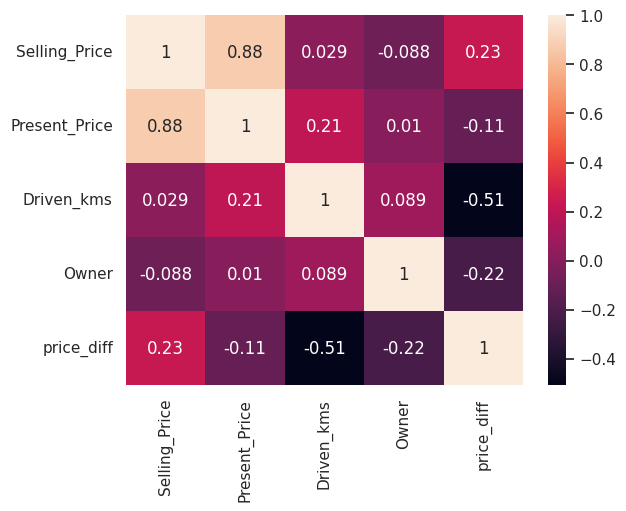

In [392]:
feature_correlation = df[num_features].corr()
sns.heatmap(feature_correlation, annot=True)

In [393]:
def flat_index(df_stats): 
    df_stats.columns = df_stats.columns.get_level_values(0) + '_' +  df_stats.columns.get_level_values(1) 
    df_stats.columns = df_stats.columns.to_flat_index() 
    df_stats.reset_index(inplace=True) 
    return df_stats

In [394]:
aggregated_df = df[num_features+['Year']].groupby(by='Year').agg(['mean', 'std'])
aggregated_df = flat_index(aggregated_df)
aggregated_df 

/tmp/ipykernel_9152/1870850199.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_df = df[num_features+['Year']].groupby(by='Year').agg(['mean', 'std'])


,Year,Selling_Price_mean,Selling_Price_std,Present_Price_mean,Present_Price_std,Driven_kms_mean,Driven_kms_std,Owner_mean,Owner_std,price_diff_mean,price_diff_std
0,2003,1.300049,1.343434,5.129883,4.031337,94500.000000,45961.940777,0.000000,0.000000,0.217769,0.090750
1,2004,1.500000,NaN,12.351562,NaN,135154.000000,NaN,0.000000,NaN,0.121442,NaN
2,2005,2.487488,1.565491,9.486206,6.153806,104294.000000,63559.476692,0.000000,0.000000,0.283908,0.045014
3,2006,1.437347,1.081137,9.058594,10.175851,87422.250000,40295.305950,0.750000,1.500000,0.191975,0.085198
4,2007,0.159973,0.056537,0.665039,0.120153,51000.000000,2828.427125,0.500000,0.707107,0.236731,0.042243
5,2008,1.002877,1.471779,4.759556,8.305253,112128.571429,173231.489769,0.142857,0.377964,0.294334,0.079809
6,2009,2.816650,1.085745,10.601562,5.902264,67820.500000,16201.723411,0.000000,0.000000,0.312393,0.107691
7,2010,5.262606,8.766931,14.332877,23.118814,60014.066667,45429.155164,0.066667,0.258199,0.389182,0.101678
8,2011,2.375251,1.477055,5.147795,3.927056,40327.368421,23467.977897,0.052632,0.229416,0.491541,0.128533
9,2012,3.841192,3.942804,7.984502,8.517218,43798.217391,25502.573966,0.043478,0.208514,0.506650,0.091269


<Axes: xlabel='Year', ylabel='Selling_Price_mean'>

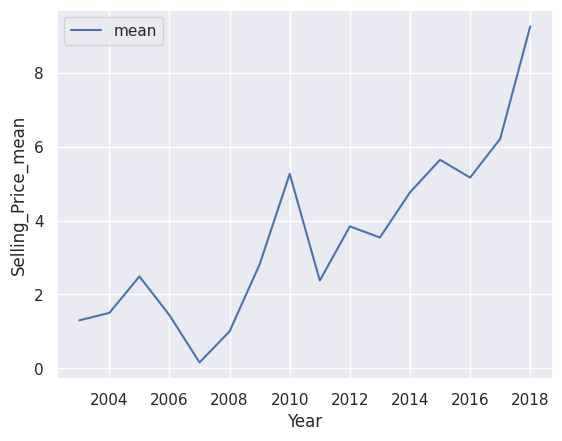

In [395]:
sns.lineplot(aggregated_df,x='Year',y='Selling_Price_mean', label='mean')

<Axes: xlabel='Year', ylabel='Driven_kms'>

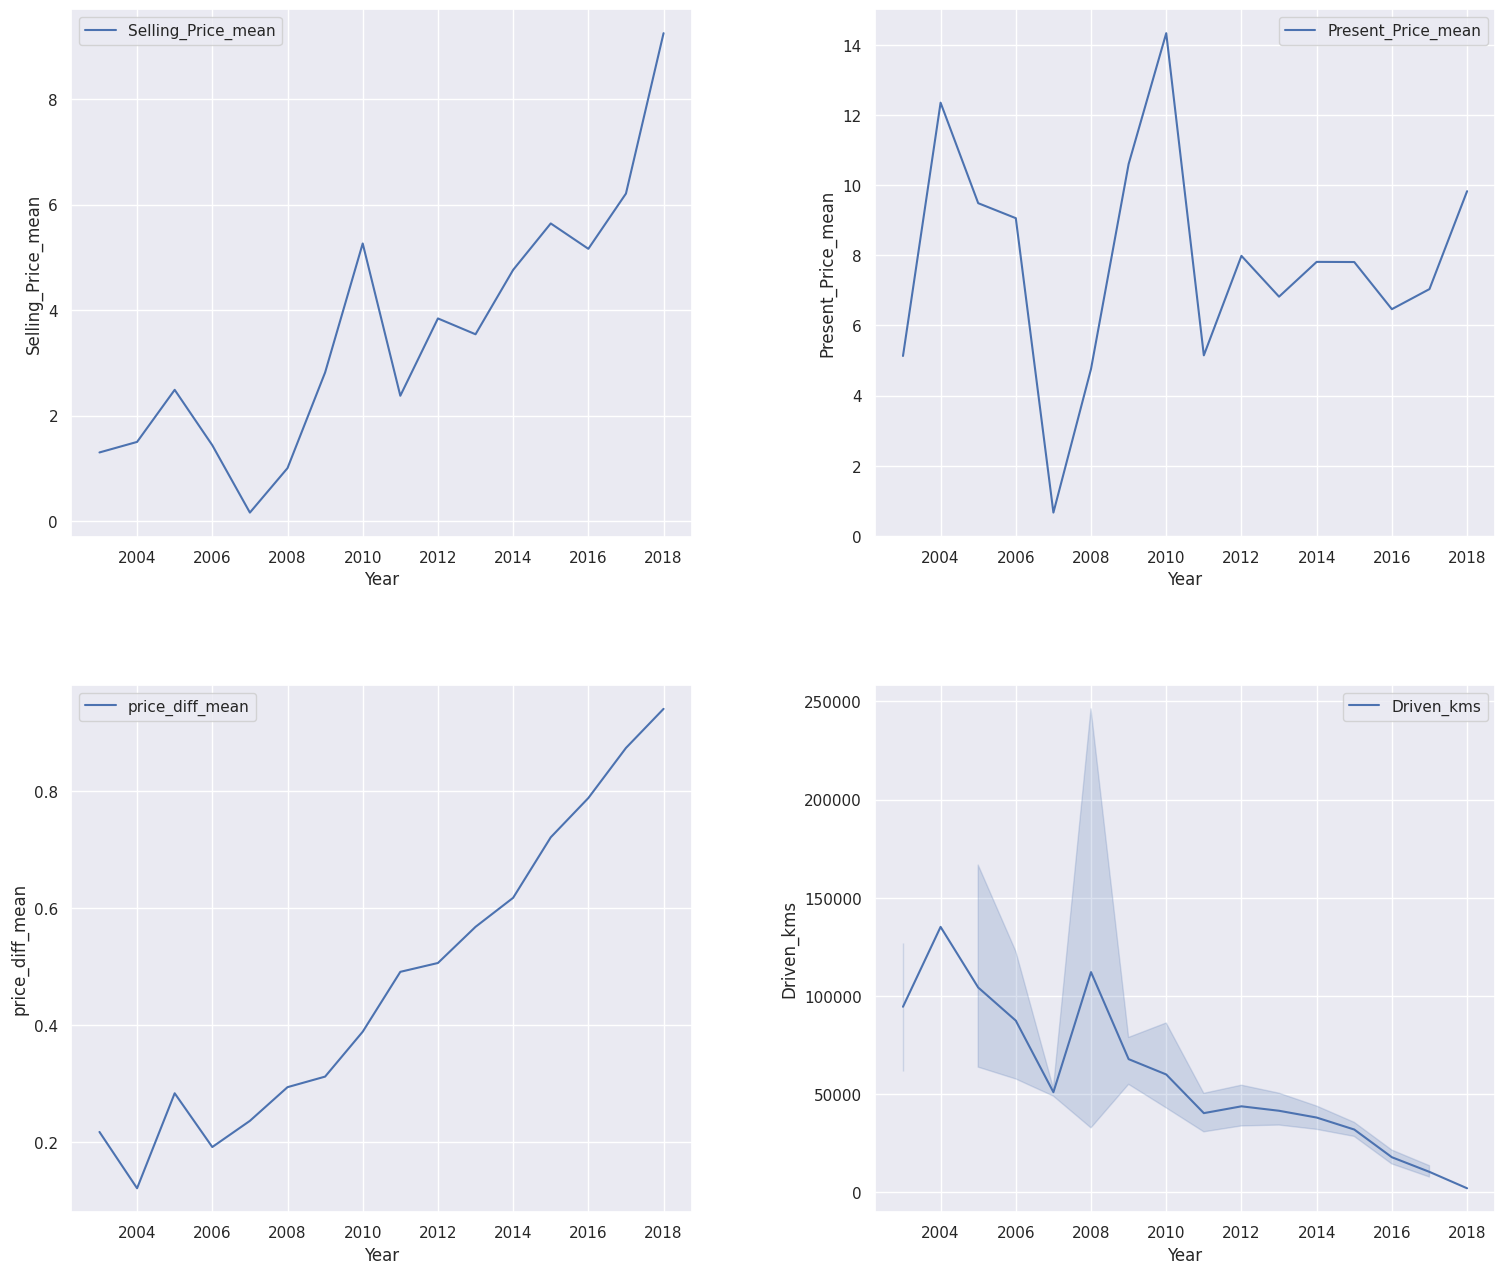

In [397]:
fig, axs = plt.pyplot.subplots(2,2)
fig.tight_layout(pad=1)
fig.set_size_inches(16.5, 14, forward=True)

sns.lineplot(aggregated_df,x='Year',y='Selling_Price_mean', label='Selling_Price_mean', ax=axs[0,0])
sns.lineplot(aggregated_df,x='Year',y='Present_Price_mean', label='Present_Price_mean',ax=axs[0,1])
sns.lineplot(aggregated_df,x='Year',y='price_diff_mean', label='price_diff_mean',ax=axs[1,0])

# Группировка непосредственно в seaborn
sns.lineplot(df, x='Year', y='Driven_kms', label='Driven_kms', ax=axs[1,1])